In [1]:
import os

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# train model with smaller dataset
from torch.utils.data import Subset

from sklearn.model_selection import KFold

In [3]:
# GoogLeNet architecture mode
import torchvision.models as models
import torch.nn as nn

# Model optimization
import torch.optim as optim

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

### Set project directory

In [5]:
os.chdir("..")

In [6]:
# Define transformations (resizing and normalization)
image_size = (128, 128)

transform = transforms.Compose([
    transforms.Resize(image_size),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [7]:
# data_folders = ['Baroque', 'Impressionism', 'Post_Impressionism', 
#                 'Abstract_Expressionism', 'Analytical_Cubism', 
#                 'Cubism', 'Synthetic_Cubism', 'Realism', 
#                 'New_Realism', 'Contemporary_Realism', 
#                 'Early_Renaissance', 'Mannerism_Late_Renaissance', 
#                 'Northern_Renaissance', 'High_Renaissance']

data_folders = ['Contemporary_Realism', 
                'Early_Renaissance',
                'Baroque', 'Impressionism', 'Post_Impressionism']

In [8]:
# Define dataset path
data_dir = "data"

# Get the full list of class names in the data directory
all_classes = os.listdir("data")
# Filter to include only selected classes
valid_classes = [cls for cls in all_classes if cls in data_folders]
# Create a mapping for selected classes
class_to_idx = {cls: i for i, cls in enumerate(valid_classes)}

# Load dataset
small_dataset = None # optional for faster model training with smaller dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Filter dataset to only keep selected classes
dataset.samples = [s for s in dataset.samples if s[1] in class_to_idx.values()]
dataset.targets = [class_to_idx[dataset.classes[i]] for i in dataset.targets if dataset.classes[i] in data_folders]
dataset.classes = valid_classes
dataset.class_to_idx = class_to_idx

### [Optional] Train model with smaller dataset (maximum images for each class)

In [9]:
# Define the maximum number of images per class
max_images_per_class = 500

In [10]:
# Create a filtered list of indices
selected_indices = []
class_counts = {cls: 0 for cls in dataset.class_to_idx.keys()}

for i in range(len(dataset)):
    _, label = dataset.samples[i]
    class_name = dataset.classes[label]
    
    if class_counts[class_name] < max_images_per_class:
        selected_indices.append(i)
        class_counts[class_name] += 1

# Create a subset dataset
small_dataset = Subset(dataset, selected_indices)

dataset = small_dataset

In [11]:
# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

### Load Pretrained GoogLeNet Model

In [ ]:
# # Load the pretrained GoogLeNet model
# model = models.googlenet(pretrained=False)

c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [13]:
# # Modify the final fully connected layer
# num_classes = len(data_folders)
# model.fc = nn.Linear(model.fc.in_features, num_classes)

In [14]:
# # Move model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

### Define the model paramters

In [26]:
# model parameters

# Define parameters for k-fold
learning_rates = [0.001, 0.0005, 0.0001]
epochs_list = [3, 5, 10]
k_folds = 5  # Number of splits for cross-validation
batch_size = 8
num_workers = 0

In [16]:
# K-Fold Cross Validator
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [17]:
# Store results
train_accuracies = {}
val_accuracies = {}

train_losses = {}
val_losses = {}

In [18]:
# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [19]:
# # Define Loss Function & Optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training the model

In [20]:
# # Get all predictions and actual labels
# all_preds = []
# all_labels = []

# for epoch in range(num_epochs):
#     # Training
#     model.train()
#     running_loss = 0.0
#     correct_train, total_train = 0, 0

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
        
#         optimizer.zero_grad()
#         outputs = model(images)

#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#         _, predicted = torch.max(outputs, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()
    
#     train_losses.append(running_loss / len(train_loader))
#     train_accuracy = 100 * correct_train / total_train
#     train_accuracies.append(train_accuracy)

#     # Validation loss
#     model.eval()
#     val_loss = 0.0
#     correct_val, total_val = 0, 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()

#             _, predicted = torch.max(outputs, 1)
#             total_val += labels.size(0)
#             correct_val += (predicted == labels).sum().item()

#             all_preds.extend(predicted.cpu().numpy())
#             all_labels.extend(labels.cpu().numpy())
    
#     val_losses.append(val_loss / len(val_loader))
#     val_accuracy = 100 * correct_val / total_val
#     val_accuracies.append(val_accuracy)

#     print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
#     print(f"Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

In [27]:
# Get all predictions and actual labels
all_preds = []
all_labels = []

# Loop through hyperparameter combinations
for lr in learning_rates:
    for num_epochs in epochs_list:
        fold_train_accuracies = []
        fold_train_losses = []
        
        fold_val_accuracies = []
        fold_val_losses = []

        print(f"\nTesting: Learning Rate = {lr}, Epochs = {num_epochs}")

        # Cross-validation loop
        for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
            print(f"Fold {fold+1}/{k_folds}")

            # Create train and validation subsets
            train_subsampler = Subset(dataset, train_idx)
            val_subsampler = Subset(dataset, val_idx)

            # Create DataLoaders
            train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True, num_workers=0)
            val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False, num_workers=0)

            # Define model
            model = models.googlenet(pretrained = False)  # Adjust num_classes if needed
            num_classes = len(data_folders)
            model.fc = nn.Linear(model.fc.in_features, num_classes)
            model.to(device)
            # Move model to GPU if available
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            model = model.to(device)

            # Loss and optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Training loop
            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0
                correct_train, total_train = 0, 0
                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)
                    
                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = criterion(outputs.logits, labels)
                    running_loss += loss.item()
                    loss.backward()
                    optimizer.step()

                    _, predicted = torch.max(outputs.logits, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()


                fold_train_accuracy = 100 * correct_train / total_train
                fold_train_accuracies.append(fold_train_accuracy)

                fold_train_losses.append(running_loss / len(train_loader))
                    

            # Validation loop
            model.eval()
            val_loss = 0.0
            correct_val, total_val = 0, 0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()
                    val_loss += loss.item()

            fold_val_accuracy = 100 * correct_val / total_val
            fold_val_accuracies.append(fold_val_accuracy)

            fold_val_losses.append(val_loss / len(val_loader))

        # Store average accuracy for this hyperparameter set
        avg_train_accuracy = np.mean(fold_train_accuracies)
        train_accuracies[(lr, num_epochs)] = avg_train_accuracy
        avg_train_loss = np.mean(fold_train_losses)
        train_losses[(lr, num_epochs)] = avg_train_loss

        avg_val_accuracy = np.mean(fold_val_accuracies)
        val_accuracies[(lr, num_epochs)] = avg_val_accuracy
        avg_val_loss = np.mean(fold_val_losses)
        val_losses[(lr, num_epochs)] = avg_val_loss
        print(f"Avg Training Accuracy for LR={lr}, Epochs={num_epochs}: {avg_train_accuracy:.2f}%")
        print(f"Avg Validation Accuracy for LR={lr}, Epochs={num_epochs}: {avg_val_accuracy:.2f}%")
        print(f"Avg Training Loss for LR={lr}, Epochs={num_epochs}: {avg_train_loss:.2f}")
        print(f"Avg Validation Loss for LR={lr}, Epochs={num_epochs}: {avg_val_loss:.2f}")


Testing: Learning Rate = 0.001, Epochs = 3
Fold 1/5


c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\torchvision\models\googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg Training Accuracy for LR=0.001, Epochs=3: 41.41%
Avg Validation Accuracy for LR=0.001, Epochs=3: 42.57%
Avg Training Loss for LR=0.001, Epochs=3: 1.40%
Avg Validation Loss for LR=0.001, Epochs=3: 1.14%

Testing: Learning Rate = 0.001, Epochs = 5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg Training Accuracy for LR=0.001, Epochs=5: 41.89%
Avg Validation Accuracy for LR=0.001, Epochs=5: 45.55%
Avg Training Loss for LR=0.001, Epochs=5: 1.38%
Avg Validation Loss for LR=0.001, Epochs=5: 1.12%

Testing: Learning Rate = 0.001, Epochs = 10
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg Training Accuracy for LR=0.001, Epochs=10: 44.33%
Avg Validation Accuracy for LR=0.001, Epochs=10: 50.29%
Avg Training Loss for LR=0.001, Epochs=10: 1.33%
Avg Validation Loss for LR=0.001, Epochs=10: 1.18%

Testing: Learning Rate = 0.0005, Epochs = 3
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg Training Accuracy for LR=0.0005, Epochs=3: 42.20%
Avg Validation Accu

In [28]:
# Find best hyperparameters
best_params = max(val_accuracies, key=val_accuracies.get)
print(f"\nBest Hyperparameters: Learning Rate = {best_params[0]}, Epochs = {best_params[1]}")


Best Hyperparameters: Learning Rate = 0.0001, Epochs = 10


### Evaluate the model

dict_items([((0.001, 3), 42.56641114026513), ((0.001, 5), 45.54629486717772), ((0.001, 10), 50.29222616658949), ((0.0005, 3), 39.16808149405773), ((0.0005, 5), 47.6591037711581), ((0.0005, 10), 48.3008351768963), ((0.0001, 3), 52.748538011695906), ((0.0001, 5), 58.72339695769237), ((0.0001, 10), 62.41155185128021)])


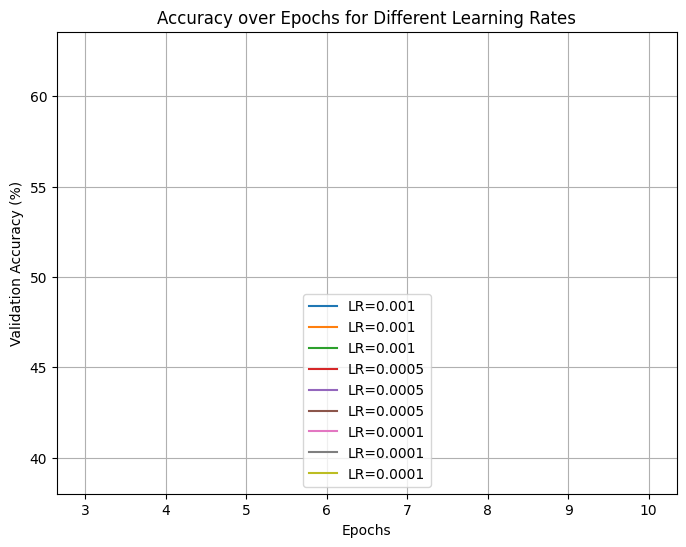

In [37]:
plt.figure(figsize=(8, 6))

print(val_accuracies.items())
# Plot each learning rate separately
for (lr, num_epochs), accuracies in val_accuracies.items():
    plt.plot(num_epochs, accuracies, label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.title("Accuracy over Epochs for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

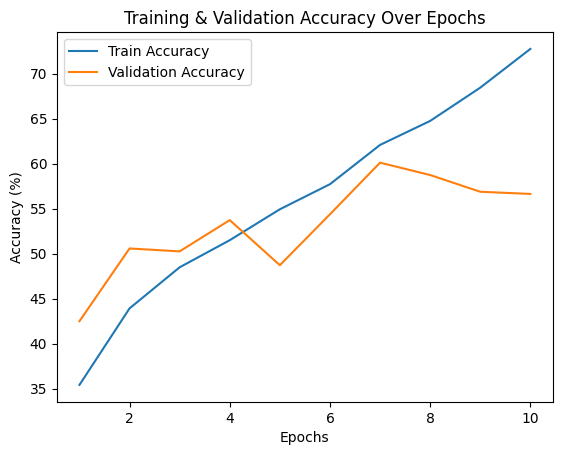

In [21]:
# Plot Accuracy Curves
plt.plot(range(1, num_epochs+1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy Over Epochs")
plt.legend()
plt.show()

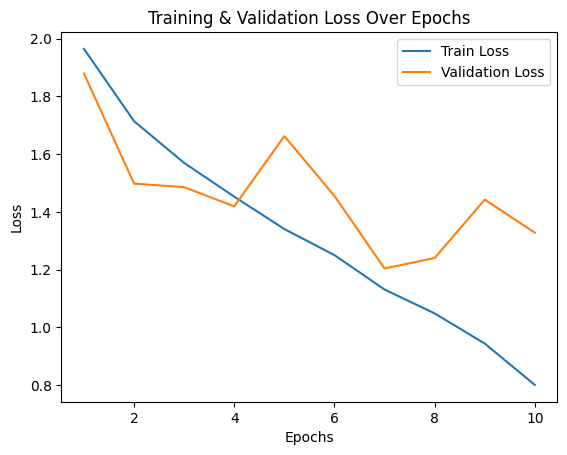

In [22]:
# Plot Loss Curves
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.show()

In [23]:
# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
if small_dataset is not None:
    class_names = dataset.dataset.classes
else:
    class_names = dataset.classes

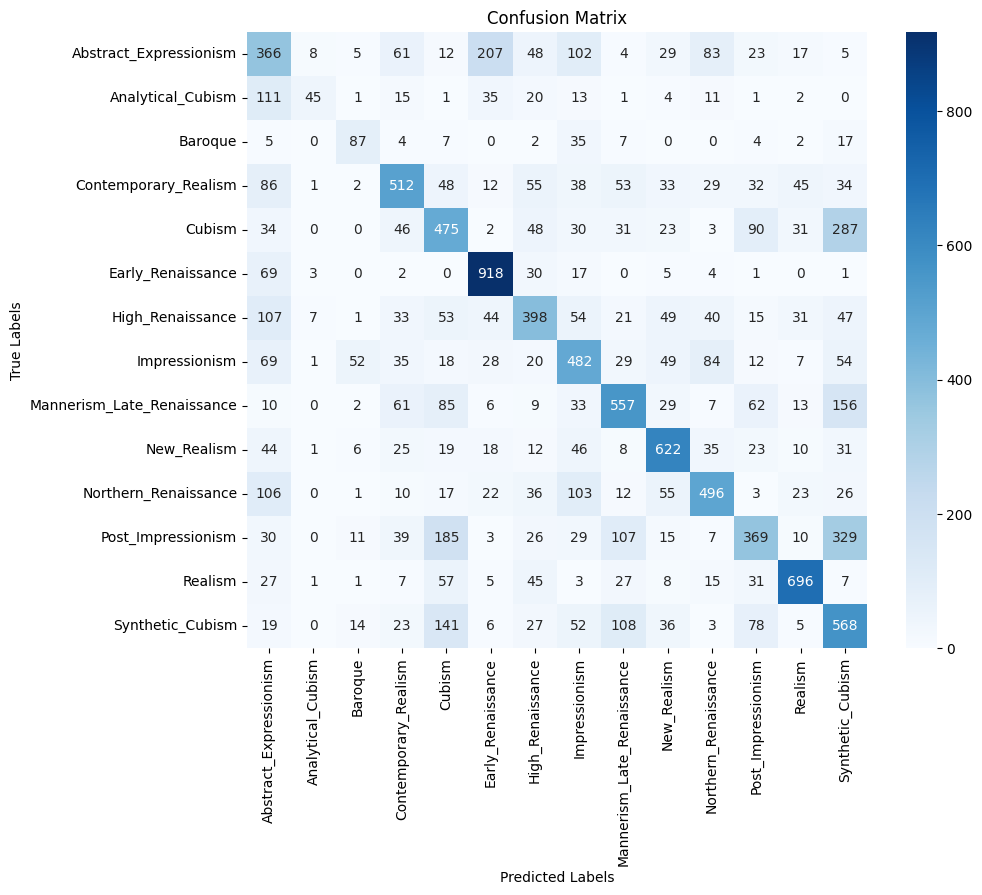

In [24]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()